## Learning bi-partite motifs based on a thermodynamic approach
### import libraries and functions

In [90]:
#imports
exec(compile(open('src/load_libs.py', 'rb').read(), 'src/load_libs.py', 'exec')) 

#dynamic programming implementation of the LL class
exec(compile(open('src/LL_avx.py', 'rb').read(), 'src/LL_avx.py', 'exec')) 

#the wrapper functions, gradient descent implementation
exec(compile(open('src/ADAM_func.py', 'rb').read(), 'src/ADAM_func.py', 'exec')) 

### Import data

In [17]:
#RBNS DATASET
if False:
    factor_number = 0

    #define paths for RBNS dataset files
    rbp_path = '../rbns_scratch/data'
    factors = np.sort(os.listdir(rbp_path)) #list available factors

    all_files = [os.listdir(os.path.join(rbp_path, factor)) for factor in factors]

    pulldown_files = [np.sort(files)[2] for files in all_files]  #take 320 concentration when available otherwise another concentration
    input_files = [[f for f in files if '_input_' in f][0] for files in all_files]
    concentrations = [f.split('_')[1] for f in pulldown_files] #see which concentration we took

    if factor_number in range(len(factors)):
        factor = factors[factor_number]
        concentration = concentrations[factor_number]
        print(f'processing {factor}')
        bg = os.path.join(rbp_path,factor,input_files[factor_number])
        pos = os.path.join(rbp_path,factor,pulldown_files[factor_number])

    background_set = parse_fastq(bg)
    background_set = [seq.replace('N', random.sample(['A','T','C','G'],1)[0]) for seq in background_set]
    print(f'dataset has {len(background_set)} background sequences.')

    positive_set = parse_fastq(pos)
    positive_set = [seq.replace('N', random.sample(['A','T','C','G'],1)[0]) for seq in positive_set]
    print(f'dataset has {len(positive_set)} positive sequences.')

In [79]:
if False:
    rbp_path = '../RBP_motif_cluster/imp3_selex'
    nround = 4
    #bg = os.path.join(rbp_path, f'GST_N40_R{nround}')
    bg = os.path.join(rbp_path, f'KH34_N40_R1')
    pos = os.path.join(rbp_path, f'KH34_N40_R{nround}')

    alphabet = ['A','T','C','G']
    L = 40
    background_set = parse_seq(bg)
    background_set = [seq+''.join([random.choice(alphabet) for i in range(5)]) for seq in background_set]
    background_set = [seq[:L] for seq in background_set]

    positive_set = parse_seq(pos)
    positive_set = [seq+''.join([random.choice(alphabet) for i in range(5)]) for seq in positive_set]
    positive_set = [seq[:L] for seq in positive_set]

    positive_set = [seq[5:35] for seq in positive_set]
    background_set = [seq[5:35] for seq in background_set]

In [80]:
if True:
    rbp_path = 'data/Nrd1/'
    pos = os.path.join(rbp_path, 'Nrd1_start0_stop5000_width20_sort_occupancy.fa')
    
    positive_set = parse_fasta(pos)
    
    L = len(positive_set[0])
    alphabet = ['A','T','C','G']

    background_set = [''.join([random.choice(alphabet) for i in range(L)]) for i in range(len(positive_set))]

In [81]:
bg_train, bg_valid = partition(background_set, 2)
pos_train, pos_valid = partition(positive_set, 2)

## Run parameter optimization 

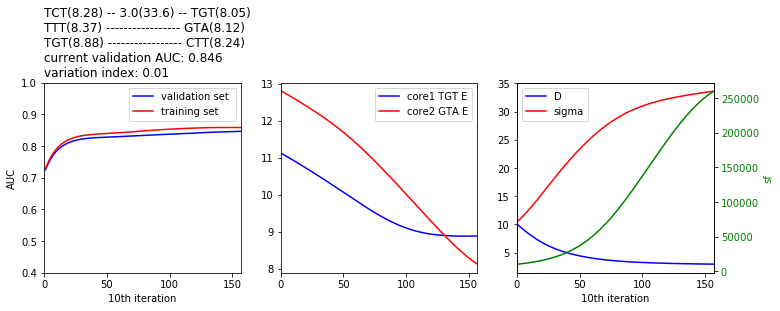

partitioned


In [ ]:
#https://elifesciences.org/articles/47040/figures#fig4s1

kmer1 = 'GTA' #GTAG
kmer2 = 'CTT' #CTTG
%matplotlib inline
    
for i in range(1,2):
    Ea = np.random.normal(loc=12.0, scale=1.0, size=len(kmer_inx))
    Eb = np.random.normal(loc=12.0, scale=1.0, size=len(kmer_inx))
    sf = np.log(10000)
    D = np.log(np.random.uniform(1,15))
    sig = np.log(np.random.uniform(1,15))

    parameters = np.concatenate([x.ravel() for x in [Ea, Eb, np.array([sf, D, sig])]])

    identifier = random.randint(1,999)
    n=1000
    
    red_thr = 20
    var_thr = 0.03
    
    seq_per_batch = 500
    
    plot_name = '%s_%d_ADAM'%('Nrd1_randomBG', identifier)

    maxiter=1000
    x_opt = optimize_adam(pos_train, bg_train, 
                          random.sample(pos_valid, n), random.sample(bg_valid, n), 
                          red_thr, var_thr, sequences_per_batch=seq_per_batch, 
                          max_iterations=maxiter, evaluate_after=1000)